## 练习2-3
创建一个1100Hz的方波信号，采样率为10000帧每秒；如果绘制其频谱，可以看到大部分谐波都被混叠了，在听音时，能听到混叠的谐波吗？

In [25]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 信号
duration = 2       # 信号持续时间（秒）
sample_rate = 44100 # 采样率（Hz）
base_freq = 1100      # 频率
amplitude = 0.5      # 振幅

# 生成时间序列
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
# 生成信号
sq_signal = amplitude * signal.square(2*np.pi*base_freq*t)

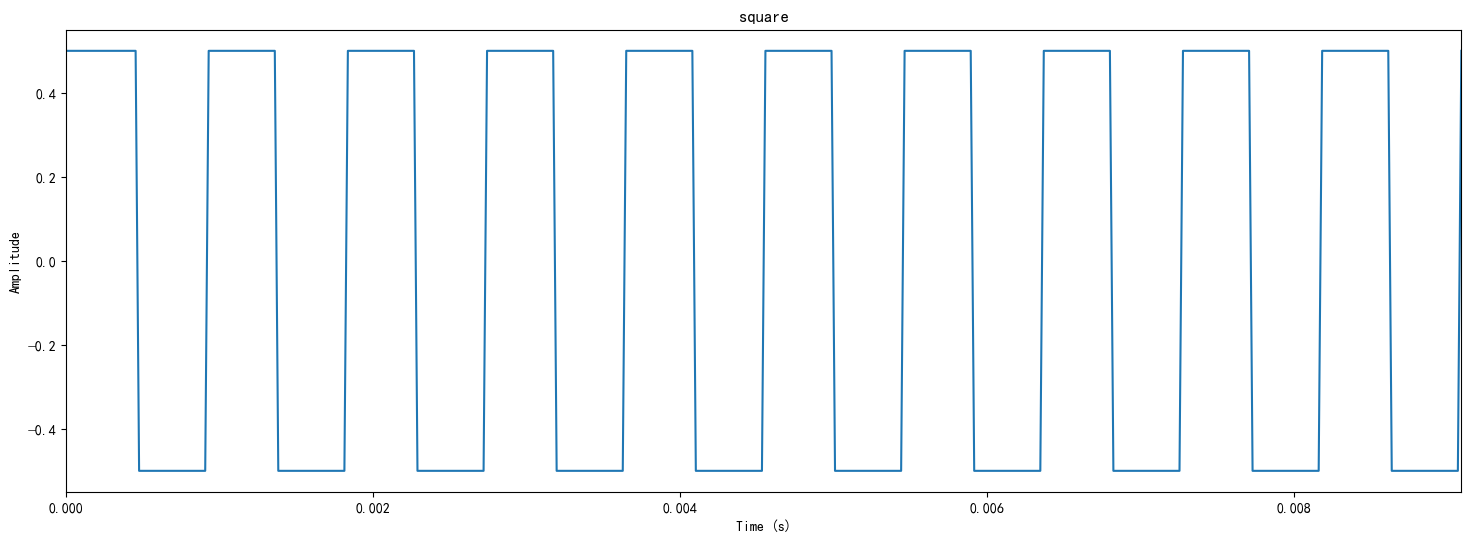

In [26]:
plt.figure(figsize=(18, 6))
plt.plot(t, sq_signal)
plt.title('square')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 5 * duration/base_freq)
plt.show()

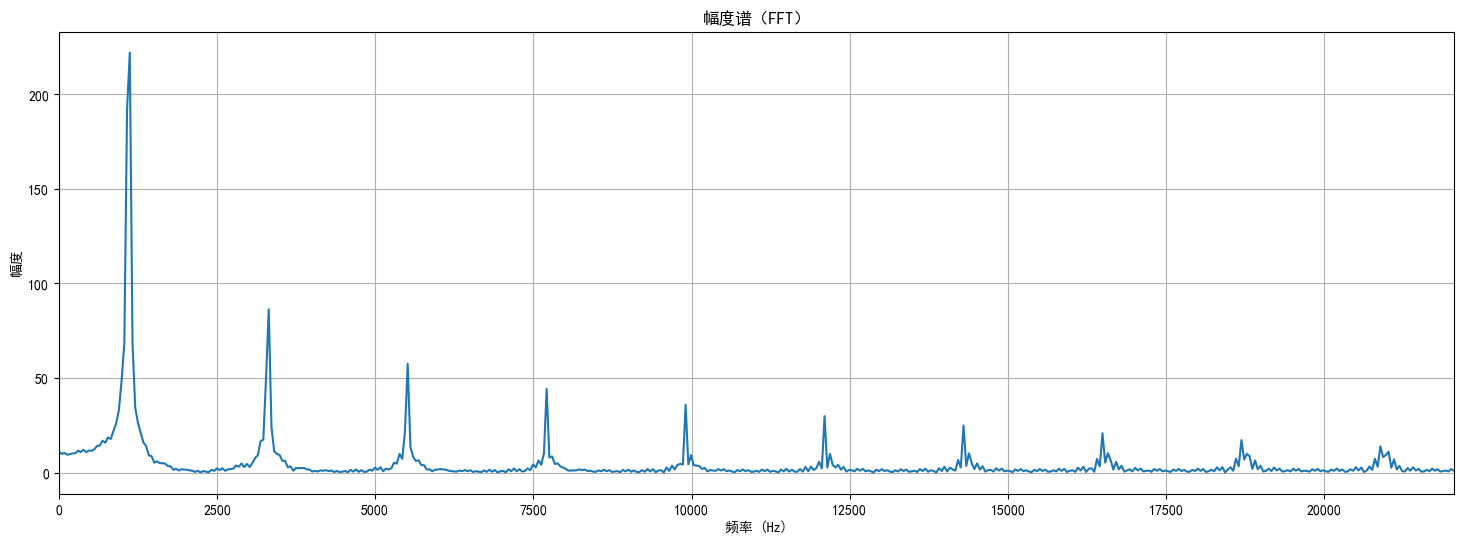

In [30]:
# 方波的频谱
n_fft = 1024 # FFT窗口大小
tri_spec = np.fft.rfft(sq_signal, n=n_fft)
amplitude = np.abs(tri_spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sample_rate)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sample_rate/2)  # 限制在Nyquist频率以内
plt.show()

In [28]:
Audio(sq_signal, rate=44100)

当采样率过低时，能够明显听到由于频谱混叠，造成高次谐波被混叠到非基波谐波位置，产生的不相干的低频噪声